<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [30]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [32]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n20.csv')

In [33]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [34]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

In [35]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

In [36]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,20.475041,95.835318,62.676240,76.011387,0.019744,265.017730,264.995332,0.022398
1,0.0,1.0,62.984177,48.069450,61.695244,26.311748,-0.052337,209.008281,209.054671,-0.046389
2,0.0,2.0,64.570458,38.610275,91.034614,63.765552,-0.072641,267.908259,267.963567,-0.055307
3,0.0,3.0,61.130528,23.324121,29.243780,64.166993,-0.016801,187.848621,187.865824,-0.017204
4,0.0,4.0,72.516059,30.321244,98.412879,39.392405,-0.033629,250.608957,250.621166,-0.012209
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,45.164424,28.958457,60.228817,34.562360,0.064147,178.978205,178.952108,0.026097
19996,999.0,16.0,98.837682,35.390402,50.544962,76.012608,-0.071311,270.714343,270.795760,-0.081418
19997,999.0,17.0,79.840311,23.492807,20.635752,85.697041,-0.029368,219.636543,219.670347,-0.033804
19998,999.0,18.0,63.595786,97.341125,64.988305,48.720863,-0.003624,284.642455,284.646649,-0.004194


In [37]:
table.set_index(['rep', 'index'], inplace=True)

In [38]:
table

x1         x2         x3         x4         e           Y       y_hat     e_hat
rep   index                                                                                        
0.0   0.0    20.475041  95.835318  62.676240  76.011387  0.019744  265.017730  264.995332  0.022398
      1.0    62.984177  48.069450  61.695244  26.311748 -0.052337  209.008281  209.054671 -0.046389
      2.0    64.570458  38.610275  91.034614  63.765552 -0.072641  267.908259  267.963567 -0.055307
      3.0    61.130528  23.324121  29.243780  64.166993 -0.016801  187.848621  187.865824 -0.017204
      4.0    72.516059  30.321244  98.412879  39.392405 -0.033629  250.608957  250.621166 -0.012209
...                ...        ...        ...        ...       ...         ...         ...       ...
999.0 15.0   45.164424  28.958457  60.228817  34.562360  0.064147  178.978205  178.952108  0.026097
      16.0   98.837682  35.390402  50.544962  76.012608 -0.071311  270.714343  270.795760 -0.081418
      17.0   79.840311  23.492807  20.635752  85.697041 -0.029368  219.636543  219.670347 -0.033804
      18.0   63.595786  97.341125  64.988305  48.720863 -0.003624  284.642455  284.646649 -0.004194
      19.0   43.853947  51.462716  71.656010  81.276746  0.017826  258.267244  258.274582 -0.007338

[20000 rows x 8 columns]

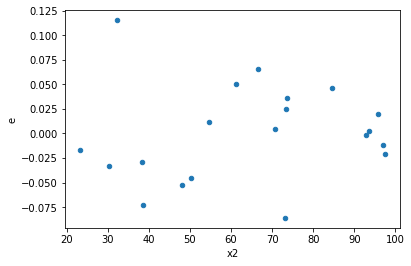

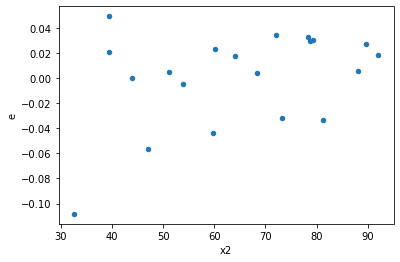

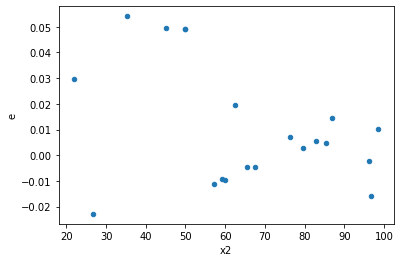

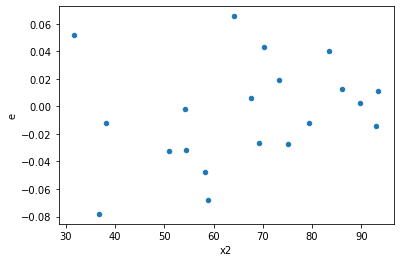

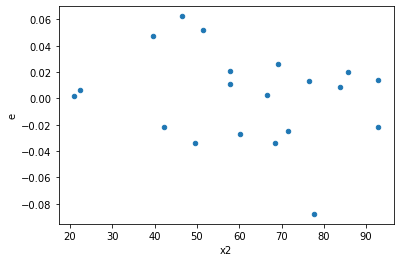

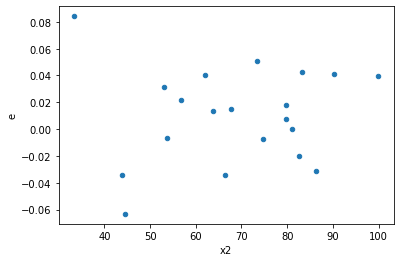

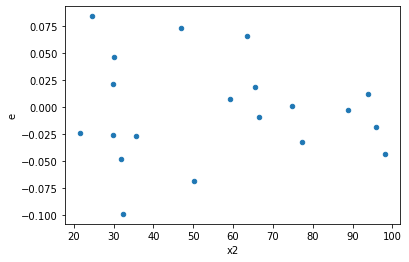

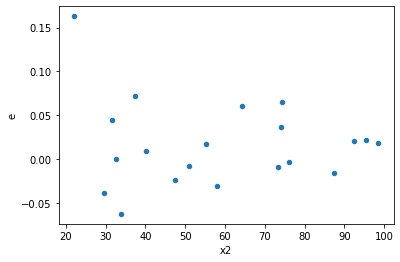

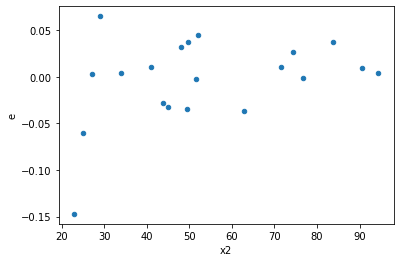

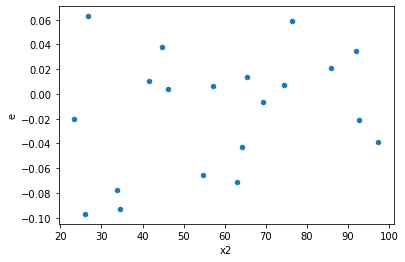

In [39]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [40]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

In [ ]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

In [41]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      856
Reject001=0 : Heteroscedasticity    144
Name: Result_test, dtype: int64